In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
from google. colab import files
uploaded = files.upload()

Saving Pride.txt to Pride (1).txt


In [ ]:
file = open("Pride.txt", "r", encoding = "utf8")

lines = []
for i in file:
    lines.append(i)

data = ""
for i in lines:
  data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')

data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Pride and prejudice, by Jane Austen This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using th'

In [ ]:
len(data)

733851

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 182, 164, 1001, 3, 299, 4, 946, 30, 72, 710, 41, 1001, 23, 21]

In [ ]:
len(sequence_data)

131237

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7250


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  131234


array([[   1,  182,  164, 1001],
       [ 182,  164, 1001,    3],
       [ 164, 1001,    3,  299],
       [1001,    3,  299,    4],
       [   3,  299,    4,  946],
       [ 299,    4,  946,   30],
       [   4,  946,   30,   72],
       [ 946,   30,   72,  710],
       [  30,   72,  710,   41],
       [  72,  710,   41, 1001]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  182  164]
 [ 182  164 1001]
 [ 164 1001    3]
 [1001    3  299]
 [   3  299    4]
 [ 299    4  946]
 [   4  946   30]
 [ 946   30   72]
 [  30   72  710]
 [  72  710   41]]
Response:  [1001    3  299    4  946   30   72  710   41 1001]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             72500     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7250)              7257250   
                                                                 
Total params: 20,378,750
Trainable params: 20,378,750
Non-trainable params: 0
_________________________________________________________________


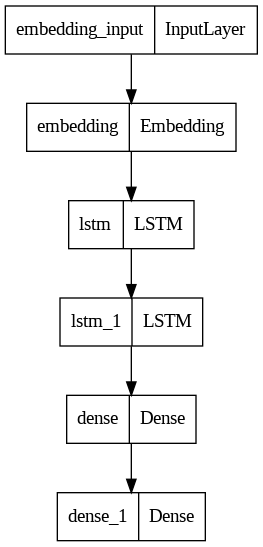

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
2051/2051 [==============================] - ETA: 0s - loss: 6.2513
Epoch 1: loss improved from inf to 6.25131, saving model to next_words.h5
2051/2051 [==============================] - 51s 21ms/step - loss: 6.2513
Epoch 2/70
2051/2051 [==============================] - ETA: 0s - loss: 5.6097
Epoch 2: loss improved from 6.25131 to 5.60966, saving model to next_words.h5
2051/2051 [==============================] - 31s 15ms/step - loss: 5.6097
Epoch 3/70
2051/2051 [==============================] - ETA: 0s - loss: 5.2788
Epoch 3: loss improved from 5.60966 to 5.27881, saving model to next_words.h5
2051/2051 [==============================] - 36s 18ms/step - loss: 5.2788
Epoch 4/70
2051/2051 [==============================] - ETA: 0s - loss: 5.0466
Epoch 4: loss improved from 5.27881 to 5.04661, saving model to next_words.h5
2051/2051 [==============================] - 31s 15ms/step - loss: 5.0466
Epoch 5/70
2051/2051 [==============================] - ETA: 0s - loss: 4.8414
E

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: The Project Gutenberg
['The', 'Project', 'Gutenberg']
1/1 [==============================] - 2s 2s/step
literary
Enter your line: The Project Gutenberg eBook of
['Gutenberg', 'eBook', 'of']
1/1 [==============================] - 0s 30ms/step
pride
Enter your line: how can you abuse your own
['abuse', 'your', 'own']
1/1 [==============================] - 0s 18ms/step
children
Enter your line: He could not help seeing that you were about five times as
['five', 'times', 'as']
1/1 [==============================] - 0s 22ms/step
pretty
Enter your line: however, it may all come to
['all', 'come', 'to']
1/1 [==============================] - 0s 19ms/step
nothing
Enter your line: 0
Execution completed.....
